<a href="https://colab.research.google.com/github/TharukDias/TharukDias/blob/main/ModelX_Hackathon_Phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Configuration ---
FILE_NAME = "Dementia Prediction Dataset.csv"

# Our target variable, based on the Data Dictionary
TARGET_VARIABLE = "DEMENTED"

# --- 1. Define Our Feature Set (Non-Medical) ---
ALLOWED_FEATURES = [
    # Demographics (Form A1)
    'NACCAGE',   # Subject's age at visit
    'EDUC',      # Years of education
    'SEX',       # Subject's sex
    'MARISTAT',  # Marital status
    'NACCLIVS',  # Living situation
    'INDEPEND',  # Level of independence
    'RESIDENC',  # Type of residence
    'HANDED',    # Handedness
    'RACE',      # Race
    'HISPANIC',  # Hispanic/Latino ethnicity
    'PRIMLANG',  # Primary language

    # Co-participant Social Context (Form A2)
    'INEDUC',    # Co-participant's years of education
    'INRELTO',   # Co-participant's relationship to subject
    'INKNOWN',   # How long co-participant has known subject
    'INLIVWTH',  # Co-participant lives with subject
    'INVISITS',  # Frequency of in-person visits
    'INCALLS',   # Frequency of telephone contact

    # Lifestyle (Form A5)
    'TOBAC100',  # Smoked more than 100 cigarettes in life
    'SMOKYRS',   # Total years smoked
    'PACKSPER',  # Average packs per day
    'QUITSMOK',  # Age at which subject last smoked
    'ALCOCCAS',  # Consumed any alcohol in past 3 months
    'ALCFREQ',   # Frequency of alcohol consumption

    # Basic Biometrics (Form B1)
    'HEIGHT',    # Height
    'WEIGHT',    # Weight
    'NACCBMI',   # Body mass index
    'VISION',    # Vision (normal)
    'VISCORR',   # Wears corrective lenses
    'VISWCORR',  # Vision with correction
    'HEARING',   # Hearing (normal)
    'HEARAID',   # Wears hearing aid
    'HEARWAID',  # Hearing with aid
]

# --- Load, Preprocess, and Split ---
print(f"Loading dataset: {FILE_NAME}...")
try:
    # --- STEP 1: LOAD DATA ---
    df = pd.read_csv(FILE_NAME, low_memory=False)
    print("Dataset loaded successfully.")
    print("-" * 30)

    # --- STEP 2: PREPROCESSING ---
    print("Starting preprocessing...")

    # Select only the columns we are allowed to use + the target
    all_model_cols = ALLOWED_FEATURES + [TARGET_VARIABLE]

    # Check if all our selected columns exist within the dataframe
    missing_cols = [col for col in all_model_cols if col not in df.columns]
    if missing_cols:
        print(f"Error: The following required columns are missing from your CSV: {missing_cols}")
    else:
        df_model = df[all_model_cols].copy()
        print(f"Original shape of full data: {df.shape}")
        print(f"Shape after selecting features: {df_model.shape}")
        print("-" * 30)

        # Handle Missing Data
        rows_before = df_model.shape[0]
        df_model.dropna(inplace=True)
        rows_after = df_model.shape[0]
        print(f"Handling missing values by dropping rows:")
        print(f"Rows before .dropna(): {rows_before}")
        print(f"Rows after .dropna():  {rows_after}")
        print(f"Total rows dropped: {rows_before - rows_after}")
        print("-" * 30)

        # Split Data into Training and Testing Sets
        print("Splitting data into training and testing sets...")

        X = df_model[ALLOWED_FEATURES]
        y = df_model[TARGET_VARIABLE]

        X_train, X_test, y_train, y_test = train_test_split(
            X, y,
            test_size=0.3,
            random_state=42,
            stratify=y  # Stratify based on the target
        )

        print("Data splitting complete.")
        print(f"X_train shape: {X_train.shape}")
        print(f"y_train shape: {y_train.shape}")
        print(f"X_test shape:  {X_test.shape}")
        print(f"y_test shape:  {y_test.shape}")

        # Print balance of target in new splits to confirm stratify worked
        print("\nVerifying target balance in splits:")
        print("Training set balance:")
        print(y_train.value_counts(normalize=True))
        print("\nTesting set balance:")
        print(y_test.value_counts(normalize=True))

        print("-" * 30)

        print("\n--- Preprocessing Complete ---")
        print("Our data is now clean, filtered, and split.")

except FileNotFoundError:
    print(f"ERROR: File not found.")
    print(f"Please make sure your file is named '{FILE_NAME}' and is in the same directory as your notebook.")
except Exception as e:
    print(f"An error occurred: {e}")

Loading dataset: Dementia Prediction Dataset.csv...
Dataset loaded successfully.
------------------------------
Starting preprocessing...
Original shape of full data: (195196, 1024)
Shape after selecting features: (195196, 33)
------------------------------
Handling missing values by dropping rows:
Rows before .dropna(): 195196
Rows after .dropna():  194711
Total rows dropped: 485
------------------------------
Splitting data into training and testing sets...
Data splitting complete.
X_train shape: (136297, 32)
y_train shape: (136297,)
X_test shape:  (58414, 32)
y_test shape:  (58414,)

Verifying target balance in splits:
Training set balance:
DEMENTED
0    0.705027
1    0.294973
Name: proportion, dtype: float64

Testing set balance:
DEMENTED
0    0.705036
1    0.294964
Name: proportion, dtype: float64
------------------------------

--- Preprocessing Complete ---
Our data is now clean, filtered, and split.


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("--- Model Development & Training ---")

# Ensure the split data is in memory
if 'X_train' not in locals():
    print("Error: X_train not found. Please re-run the previous script to load and split the data.")
else:
    # --- 1. Scale Features ---
    # We fit the scaler ONLY on the training data to prevent data leakage
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Features scaled successfully.")
    print("-" * 30)

    # --- 2. Model 1: Logistic Regression (Baseline) ---
    print("Training Model 1: Logistic Regression...")
    # We set max_iter=1000 to ensure convergence
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred_lr = lr_model.predict(X_test_scaled)
    y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1] # Probabilities for ROC-AUC

    print("--- Logistic Regression Results ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_lr):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_lr, target_names=['Not Demented (0)', 'Demented (1)']))
    print("-" * 30)

    # --- 3. Model 2: Random Forest Classifier ---
    print("Training Model 2: Random Forest Classifier...")
    # We use n_estimators=100 as a strong default
    rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
    rf_model.fit(X_train_scaled, y_train) # Note: RF doesn't *require* scaling, but it doesn't hurt

    # Make predictions on the test set
    y_pred_rf = rf_model.predict(X_test_scaled)
    y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1] # Probabilities for ROC-AUC

    print("--- Random Forest Results ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf, target_names=['Not Demented (0)', 'Demented (1)']))
    print("-" * 30)

    print("Model comparison complete.")

--- Step 3: Model Development & Training ---
Scaling features...
Features scaled successfully.
------------------------------
Training Model 1: Logistic Regression...
--- Logistic Regression Results ---
Accuracy: 0.8937
ROC-AUC Score: 0.9253

Classification Report:
                  precision    recall  f1-score   support

Not Demented (0)       0.92      0.93      0.93     41184
    Demented (1)       0.83      0.80      0.82     17230

        accuracy                           0.89     58414
       macro avg       0.88      0.87      0.87     58414
    weighted avg       0.89      0.89      0.89     58414

------------------------------
Training Model 2: Random Forest Classifier...
--- Random Forest Results ---
Accuracy: 0.9067
ROC-AUC Score: 0.9416

Classification Report:
                  precision    recall  f1-score   support

Not Demented (0)       0.93      0.94      0.93     41184
    Demented (1)       0.85      0.84      0.84     17230

        accuracy                     

--- Step 4: Hyperparameter Tuning & Explainability ---
Tuning Random Forest model... (This may take a minute or two)
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tuning complete.
Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 150}
Best cross-validation ROC-AUC score: 0.9370
------------------------------
--- Final Tuned Model Results ---
Accuracy: 0.9055
ROC-AUC Score: 0.9418

Final Classification Report:
                  precision    recall  f1-score   support

Not Demented (0)       0.94      0.93      0.93     41184
    Demented (1)       0.83      0.85      0.84     17230

        accuracy                           0.91     58414
       macro avg       0.89      0.89      0.89     58414
    weighted avg       0.91      0.91      0.91     58414

------------------------------
--- Model Explainability & Insights ---
Top 10 Most Predictive Features:
     feature  importance
5   INDEPEND    0.587394
0    NACCAGE    0.036561
4   NACCLIVS

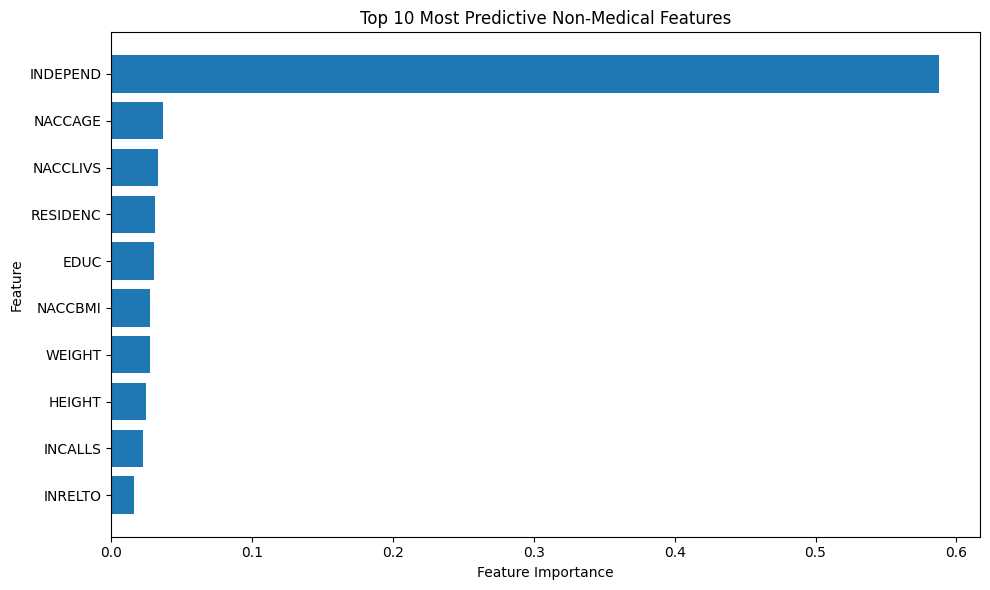

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("--- Hyperparameter Tuning & Explainability ---")

# Ensure the split and scaled data is in memory
if 'X_train_scaled' not in locals():
    print("Error: X_train_scaled not found. Please re-run the previous scripts first.")
else:
    # --- 1. Hyperparameter Tuning (GridSearchCV) ---
    print("Tuning Random Forest model... (This may take a few minutes)")

    # Define a smaller, faster grid of parameters to search
    # We are tuning the number of trees and the max depth of each tree
    param_grid = {
        'n_estimators': [50, 100, 150],  # Number of trees in the forest
        'max_depth': [10, 20, None],     # Max depth of the tree (None = no limit)
        'min_samples_leaf': [1, 2, 4]    # Minimum samples required at a leaf node
    }

    # We will optimize for ROC-AUC, our key metric
    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=3,  # 3-fold cross-validation
        scoring='roc_auc', # Our primary success metric
        n_jobs=-1, # Use all available CPU cores
        verbose=1  # Show progress
    )

    # Run the tuning process
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model
    best_rf_model = grid_search.best_estimator_

    print("Tuning complete.")
    print(f"Best parameters found: {grid_search.best_params_}")
    print(f"Best cross-validation ROC-AUC score: {grid_search.best_score_:.4f}")
    print("-" * 30)

    # --- 2. Evaluate the Final Tuned Model ---
    print("--- Final Tuned Model Results ---")
    y_pred_final = best_rf_model.predict(X_test_scaled)
    y_proba_final = best_rf_model.predict_proba(X_test_scaled)[:, 1]

    print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_final):.4f}")
    print("\nFinal Classification Report:")
    print(classification_report(y_test, y_pred_final, target_names=['Not Demented (0)', 'Demented (1)']))
    print("-" * 30)

    # --- 3. Explain the Model (Feature Importance) ---
    print("--- Model Explainability & Insights ---")

    # Get feature importances from our best model
    importances = best_rf_model.feature_importances_

    # Create a DataFrame for easy viewing
    # 'ALLOWED_FEATURES' must be in memory from the previous script
    feature_importance_df = pd.DataFrame({
        'feature': ALLOWED_FEATURES,
        'importance': importances
    }).sort_values(by='importance', ascending=False)

    print("Top 10 Most Predictive Features:")
    print(feature_importance_df.head(10))
    print("-" * 30)

    print("All steps complete! This is the final output for our model.")

    # --- Visualization ---
    # This will create a bar chart of the top features.
    # This chart is included in our report.
    try:
        plt.figure(figsize=(10, 6))
        top_10_features = feature_importance_df.head(10)
        plt.barh(top_10_features['feature'], top_10_features['importance'])
        plt.xlabel("Feature Importance")
        plt.ylabel("Feature")
        plt.title("Top 10 Most Predictive Non-Medical Features")
        plt.gca().invert_yaxis() # Display most important feature at the top
        plt.tight_layout()

        # Save the plot
        plot_filename = "feature_importance.png"
        plt.savefig(plot_filename)
        print(f"\nSuccessfully saved feature importance plot as '{plot_filename}'")

    except Exception as e:
        print(f"\nCould not create visualization: {e}")